In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow import keras
import os
from sklearn.model_selection import train_test_split

In [4]:
data = []
labels = []
classes = 43
cur_path = '/home/rishabh/data/archive'

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [6]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape)
print( X_test.shape)
print(y_train.shape)
print( y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3)
(7842, 30, 30, 3)
(31367,)
(7842,)


In [7]:
y_train = keras.utils.to_categorical(y_train, 43)
y_test = keras.utils.to_categorical(y_test, 43)

In [8]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]),
tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
tf.keras.layers.Dropout(rate=0.25),
tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
tf.keras.layers.Dropout(rate=0.25),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dropout(rate=0.5),
tf.keras.layers.Dense(43, activation='softmax')])

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
981/981 [==============================] - 50s 50ms/step - loss: 1.9672 - accuracy: 0.4926 - val_loss: 0.7075 - val_accuracy: 0.8114
Epoch 2/10
981/981 [==============================] - 51s 52ms/step - loss: 0.8948 - accuracy: 0.7400 - val_loss: 0.3348 - val_accuracy: 0.9156
Epoch 3/10
981/981 [==============================] - 51s 52ms/step - loss: 0.6518 - accuracy: 0.8059 - val_loss: 0.3496 - val_accuracy: 0.8952
Epoch 4/10
981/981 [==============================] - 52s 53ms/step - loss: 0.5418 - accuracy: 0.8404 - val_loss: 0.1795 - val_accuracy: 0.9495
Epoch 5/10
981/981 [==============================] - 51s 52ms/step - loss: 0.4492 - accuracy: 0.8660 - val_loss: 0.1759 - val_accuracy: 0.9494
Epoch 6/10
981/981 [==============================] - 56s 57ms/step - loss: 0.3872 - accuracy: 0.8850 - val_loss: 0.1435 - val_accuracy: 0.9573
Epoch 7/10
981/981 [==============================] - 56s 57ms/step - loss: 0.3689 - accuracy: 0.8891 - val_loss: 0.1770 - val_accuracy:

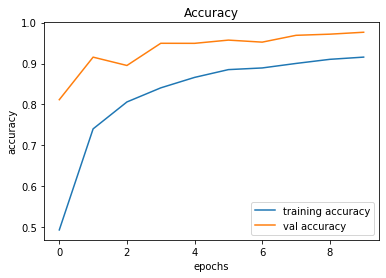

In [10]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()



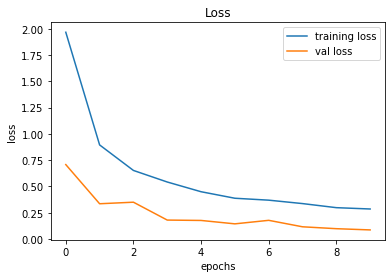

In [11]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()